# Part 2: Engineering columns from existing data using Pandas

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import readability

In [2]:
speeches = pd.read_csv("part1.csv", index_col = 0)

In [3]:
speeches = speeches.assign(len_speech = lambda speeches: speeches['speech'].map(lambda x: len(x)))# - x.count(",")))
# speeches

In [4]:
# Replace ?/! with .
cleaned_speeches = speeches.copy()
cleaned_speeches["speech"] = cleaned_speeches["speech"].str.replace("!",".", regex = True) 
cleaned_speeches["speech"] = cleaned_speeches["speech"].str.replace("?",".", regex = True) 
# cleaned_speeches

In [5]:
# Split speech into sentences and calculate length
cleaned_speeches["sentences"] = cleaned_speeches.speech.apply(lambda x: x.split("."))
cleaned_speeches = cleaned_speeches.assign(num_sentences = lambda cleaned_speeches: cleaned_speeches['sentences'].map(lambda x: len(x)))
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[ Mr, Speaker, Mr, Vice President, members o...",518
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"[Mr, Speaker, Mr, Vice President, members of...",455
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352


In [6]:
# Create column with average sentence length
cleaned_speeches = cleaned_speeches.assign(average_sen_length = lambda x: x['len_speech'] / x["num_sentences"])
cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[ Mr, Speaker, Mr, Vice President, members o...",518,81.474903
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"[Mr, Speaker, Mr, Vice President, members of...",455,90.553846
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352,113.661932


We now obtain the readability scores of the speeches.

There are a lot of readability scores, but we will focus on two scores:
1. SMOG
2. Flesch reading ease score

In [8]:
# Add SMOGIndex and FleschReadingEase as columns to dataframe
smogindex_list = []
flesch_list = []
for sotu in cleaned_speeches.speech:
    smogindex_list.append(readability.getmeasures(sotu,lang="en")["readability grades"]["SMOGIndex"])
    flesch_list.append(readability.getmeasures(sotu,lang="en")["readability grades"]["FleschReadingEase"])

cleaned_speeches["SMOG_index"] = smogindex_list
cleaned_speeches["FleschReadingEase"] = flesch_list

cleaned_speeches.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,FleschReadingEase
0,speeches\obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"[Madam Speaker, Vice President Biden, members ...",562,77.754448,17.826429,24.720575
1,speeches\obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"[Mr, Speaker, Mr, Vice President, members of...",500,82.046000,16.543303,32.322806
2,speeches\obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[ Mr, Speaker, Mr, Vice President, members o...",518,81.474903,17.344065,26.228014
3,speeches\obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"[Mr, Speaker, Mr, Vice President, members of...",455,90.553846,14.187551,52.062427
4,speeches\obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"[Mr, Speaker, Mr, Vice President, Members of...",352,113.661932,19.064501,9.227649


## Visualizing the speech metrics

We now perform data visualisation on the newly engineered metrics in our dataframe.

<AxesSubplot:xlabel='name', ylabel='len_speech'>

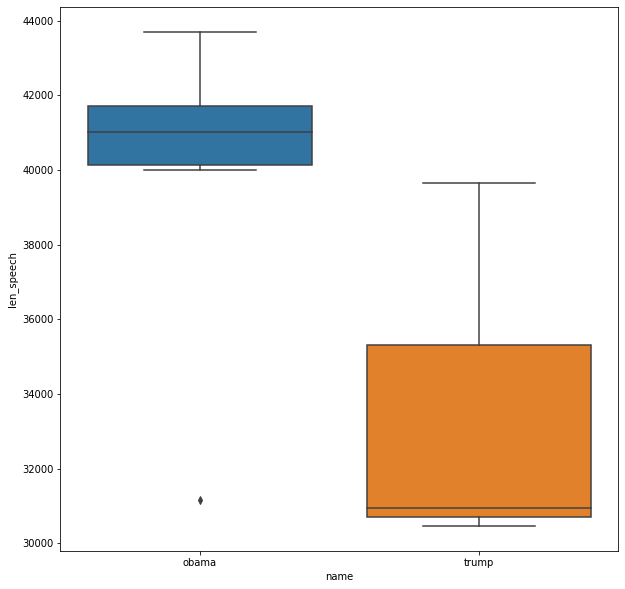

In [9]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "len_speech")

<AxesSubplot:xlabel='name', ylabel='num_sentences'>

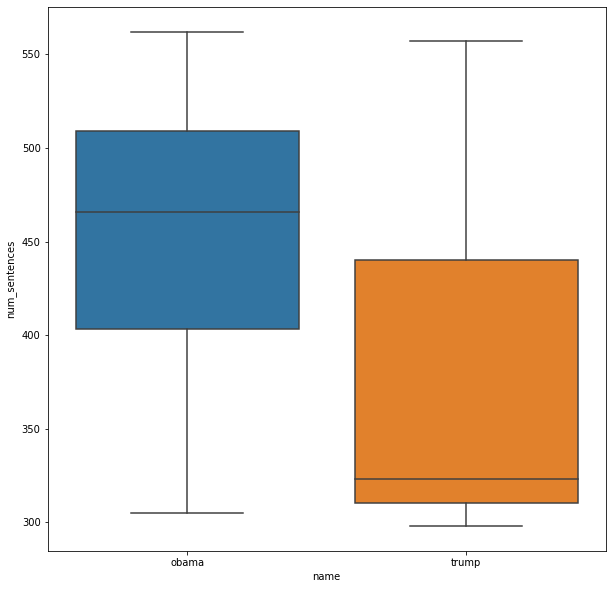

In [10]:
# num_sentences
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "num_sentences")

<AxesSubplot:xlabel='name', ylabel='average_sen_length'>

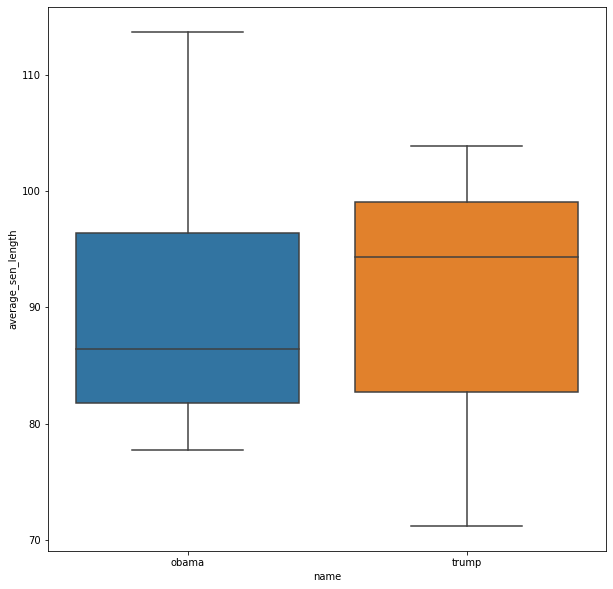

In [11]:
# Plot average_sen_length with a boxplot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "average_sen_length")

In [12]:
# Print the average_sen_length
obama = cleaned_speeches[cleaned_speeches["name"] == "obama"]
trump = cleaned_speeches[cleaned_speeches["name"] == "trump"]

print("Obama's total average sentence length is: ", obama["average_sen_length"].sum() / len(obama))
print("Trump's total average sentence length is: ",trump["average_sen_length"].sum() / len(trump))

Obama's total average sentence length is:  90.5845968830769
Trump's total average sentence length is:  89.77317446805695


<AxesSubplot:xlabel='name', ylabel='SMOG_index'>

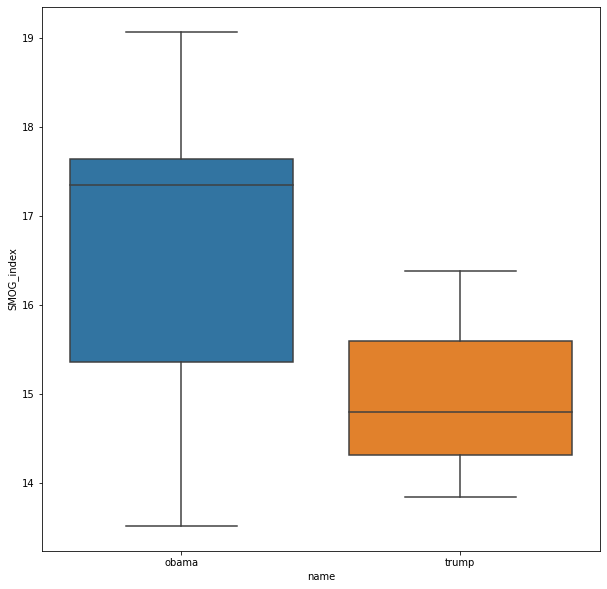

In [13]:
# Plot SMOG_index with a boxplot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "SMOG_index")

<AxesSubplot:xlabel='name', ylabel='FleschReadingEase'>

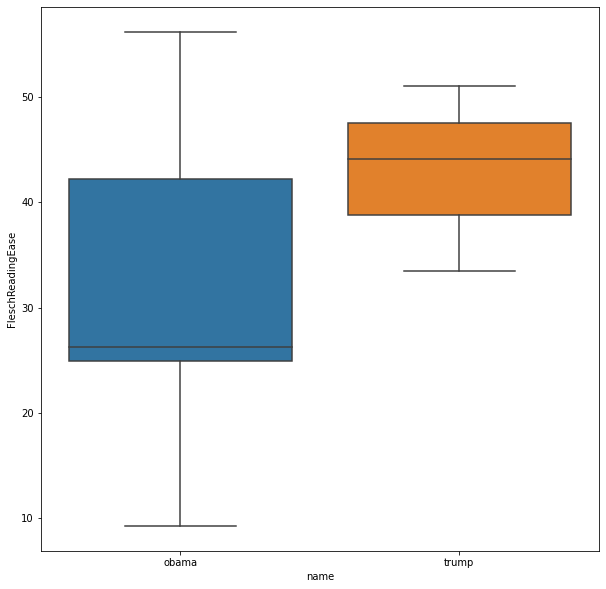

In [14]:
# Plot average_sen_length with a boxplot
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = cleaned_speeches, x = "name", y = "FleschReadingEase")

From the barplots that were plotted for the SMOG and Flesch Reading Ease scores, we can generally say that Trump's speeches are easier to read, whereby Obama's speeches are harder. In fact, [this article ](https://www.firstrand.co.za/perspectives/an-analysis-of-president-donald-trump-s-use-of-language/) attributes one of the factors leading to Trump's rise to power was the ease of understanding his messages in his speeches.

In [15]:
# Export the DataFrame to CSV
cleaned_speeches.to_csv("part2.csv")